In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X

In [31]:
# Both in Pytorch and Tensorflow, the .numpy() method is pretty much straightforward. It converts a
# tensor object into an numpy.ndarray object. 
# This implicitly means that the converted tensor will be now processed on the CPU.

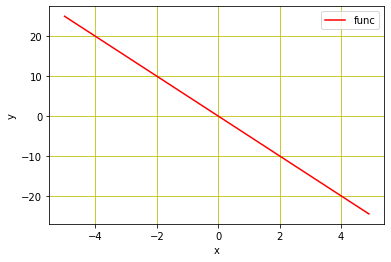

In [32]:
# Plot the line in red with grids
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

In [33]:
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 0.4 * torch.randn(X.size())

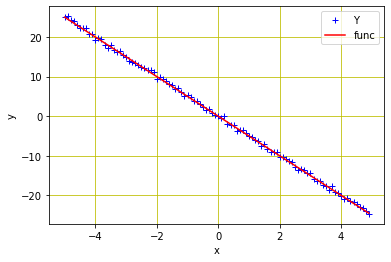

In [34]:
# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

In [35]:
# defining the function for forward pass for prediction
def forward(x):
    return w * x

In [36]:
# evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

In [37]:
# First, the parameter  need to be initialized randomly, for example, to the value .
w = torch.tensor(-10.0, requires_grad=True)

In [46]:
w

tensor(-10., requires_grad=True)

In [47]:
step_size = 0.1
loss_list = []
iter = 20

In [50]:
loss_list

[208.29820251464844,
 92.75609588623047,
 41.35262680053711,
 18.483793258666992,
 8.309709548950195,
 3.783365249633789,
 1.7696456909179688,
 0.8737658858299255,
 0.4751981794834137,
 0.2978799343109131,
 0.2189929038286209,
 0.18389716744422913,
 0.16828326880931854,
 0.1613370180130005,
 0.15824666619300842,
 0.15687181055545807,
 0.15626010298728943,
 0.155987948179245,
 0.15586693584918976,
 0.155813068151474]

In [48]:
for i in range (iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    # priting the values for understanding
    print('{},\t{},\t{}'.format(i, loss.item(), w.item()))

0,	208.29820251464844,	-1.669651985168457
1,	92.75609588623047,	-7.22599458694458
2,	41.35262680053711,	-3.519914388656616
3,	18.483793258666992,	-5.991869926452637
4,	8.309709548950195,	-4.343075752258301
5,	3.783365249633789,	-5.442821025848389
6,	1.7696456909179688,	-4.709290981292725
7,	0.8737658858299255,	-5.1985554695129395
8,	0.4751981794834137,	-4.87221622467041
9,	0.2978799343109131,	-5.089884281158447
10,	0.2189929038286209,	-4.944699764251709
11,	0.18389716744422913,	-5.041537761688232
12,	0.16828326880931854,	-4.976946830749512
13,	0.1613370180130005,	-5.020029067993164
14,	0.15824666619300842,	-4.991293430328369
15,	0.15687181055545807,	-5.010459899902344
16,	0.15626010298728943,	-4.997675895690918
17,	0.155987948179245,	-5.006202697753906
18,	0.15586693584918976,	-5.000515460968018
19,	0.155813068151474,	-5.004308700561523


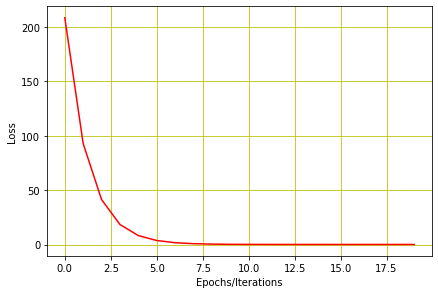

In [23]:
# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

In [49]:
loss

tensor(0.1558, grad_fn=<MeanBackward0>)

In [25]:
#training model for 2 parameters
# defining the function for forward pass for prediction
def forward(x):
    return w * x + b
w = torch.tensor(-10.0, requires_grad = True)
b = torch.tensor(-20.0, requires_grad = True)

In [26]:
step_size = 0.1
loss_list = []
iter = 20
 
for i in range (iter):    
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	599.1749877929688, 	-1.8677568435668945, 	-16.046051025390625
1, 	345.1440124511719, 	-7.25242280960083, 	-12.801570892333984
2, 	203.87513732910156, 	-3.628405809402466, 	-10.259832382202148
3, 	122.94283294677734, 	-6.02020788192749, 	-8.190201759338379
4, 	75.36251831054688, 	-4.404179573059082, 	-6.558415412902832
5, 	46.786048889160156, 	-5.465752601623535, 	-5.236825942993164
6, 	29.330604553222656, 	-4.744467735290527, 	-4.1901702880859375
7, 	18.529497146606445, 	-5.215097904205322, 	-3.345632791519165
8, 	11.781264305114746, 	-4.892742156982422, 	-2.6747090816497803
9, 	7.53537654876709, 	-5.101044178009033, 	-2.134746551513672
10, 	4.850343704223633, 	-4.956707000732422, 	-1.7048596143722534
11, 	3.146225690841675, 	-5.048681259155273, 	-1.359506607055664
12, 	2.0619001388549805, 	-4.983880996704102, 	-1.0841439962387085
13, 	1.3707032203674316, 	-5.024349212646484, 	-0.8632058501243591
14, 	0.9295469522476196, 	-4.995147228240967, 	-0.6868600845336914
15, 	0.647732019424

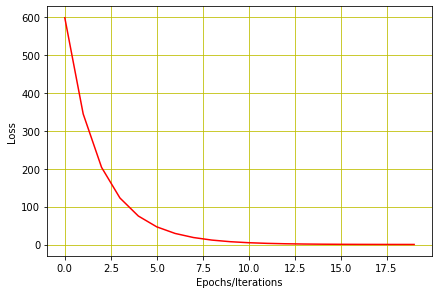

In [27]:
# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Summary
# In this tutorial you learned how you can build and train a simple linear regression model in PyTorch. Particularly, you learned.

# How you can build a simple linear regression model from scratch in PyTorch.
# How you can apply a simple linear regression model on a dataset.
# How a simple linear regression model can be trained on a single learnable parameter.
# How a simple linear regression model can be trained on two learnable parameters.